In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def G(s):
    return numpy.array([[4.05 * numpy.exp(-27*s) / (50*s + 1),
                         1.77 * numpy.exp(-28*s) / (60*s + 1),
                         5.88 * numpy.exp(-27*s) / (50*s + 1)],
                        [5.39 * numpy.exp(-18*s) / (50*s + 1),
                         5.72 * numpy.exp(-14*s) / (60*s + 1),
                         6.90 * numpy.exp(-15*s) / (40*s + 1)],
                        [4.38 * numpy.exp(-20*s) / (33*s + 1),
                         4.42 * numpy.exp(-22*s) / (44*s + 1),
                         7.20 * numpy.exp(-0*s) / (19*s + 1)]])

def compensator(s):
    return numpy.matrix([
[ (0.7758*s**4 + 0.2897*s**3 + 0.6933*s**2 + 0.2112*s + 0.8522)/(0.3698*s**4 + 0.7059*s**3 + 0.7068*s**2 + 0.1573*s + 0.849), (0.6347*s**4 + 0.92*s**3 + 0.9788*s**2 + 0.1182*s + 0.2724)/(0.4146*s**4 + 0.4356*s**3 + 0.7927*s**2 + 0.0507*s + 0.6826),     (0.246*s**4 + 0.1986*s**3 + 0.918*s**2 + 0.2371*s + 0.7241)/(1.1449*s**4 + 0.56*s**3 + 0.1516*s**2 + 0.0809*s + 0.5492)],
[(0.4154*s**4 + 0.4907*s**3 + 0.6919*s**2 + 0.7222*s + 0.6596)/(0.8712*s**4 + 0.3248*s**3 + 0.7562*s**2 + 0.1188*s + 0.7187), (0.143*s**4 + 0.9381*s**3 + 0.0363*s**2 + 0.5935*s + 0.3953)/(0.8651*s**4 + 0.1523*s**3 + 0.3149*s**2 + 0.2693*s + 0.429),    (0.2802*s**4 + 0.331*s**3 + 0.9575*s**2 + 0.2682*s + 0.1605)/(0.8115*s**4 + 0.804*s**3 + 0.8133*s**2 + 0.939*s + 0.4737)],
[ (0.7387*s**4 - 0.0239*s**3 + 0.262*s**2 + 0.3662*s + 0.8999)/(0.7673*s**4 + 0.0962*s**3 + 0.8871*s**2 + 0.3849*s + 1.0315),   (0.7456*s**4 + 0.3656*s**3 + 0.0758*s**2 + 0.5717*s + 0.69)/(0.2821*s**4 + 0.5967*s**3 + 0.0065*s**2 + 0.06*s + 0.5726), (1.0878*s**4 + 0.7457*s**3 + 0.4789*s**2 + 0.0271*s + 0.8954)/(0.5798*s**4 + 0.0496*s**3 + 0.1238*s**2 + 0.1125*s + 0.4841)]])

In [3]:
ws = numpy.logspace(-3, 3, 1000)
jws = 1j * ws
N = 3

In [4]:
def plot_geshgorin(fs, row=True, name='geshgorin'):
    ax = 2 if row else 1
    diags = numpy.array([numpy.diag(f) for f in fs])
    diags_abs = numpy.abs(diags)
    offdiag_sum_abs = numpy.sum(numpy.abs(fs), axis=ax) - diags_abs
    print(numpy.max(offdiag_sum_abs/diags_abs))

    plt.figure(figsize=(10, 5))
    for i in range(diags.shape[1]):
        plt.subplot(1, N, i+1)
        ax = plt.gca()
        ax.set_aspect('equal', 'datalim')
        for center, radius in zip(diags[:, i], offdiag_sum_abs[:, i]):
            circle = mpl.patches.Circle(xy=(numpy.real(center), numpy.imag(center)), radius=radius, fill=False, alpha=0.5)
            ax.add_patch(circle)

        plt.plot(0, 0, 'rx')
        plt.plot(numpy.real(diags[:, i]), numpy.imag(diags[:, i]), 'r')
#         plt.plot(numpy.real(diags[:, i]), -numpy.imag(diags[:, i]), 'r')
        plt.autoscale(True)
    plt.savefig(f"{name}.pdf")
    plt.show()

2.9402097898265493


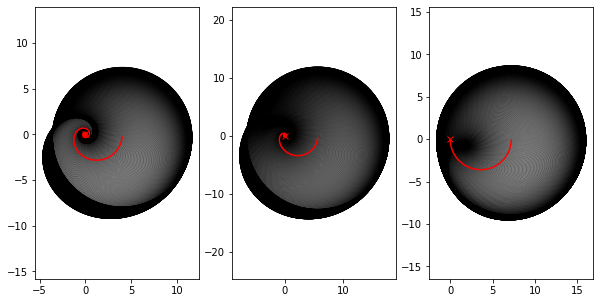

In [5]:
fs = numpy.array([G(jw) for jw in jws])
plot_geshgorin(fs, row=True, name='uncomp')

2.5302560896384736


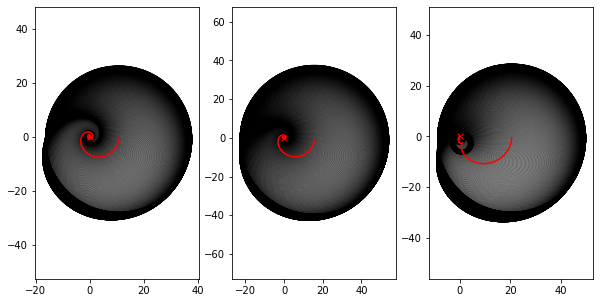

In [6]:
fs = numpy.array([G(jw) @ compensator(jw) for jw in jws])
plot_geshgorin(fs, row=True, name='comp')